Exam 14th of June 2023, 8.00–13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

1.1 Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.
   This exam has 3 problems for a total of 40 points, to pass you need 20 points.

1.2 Some general hints and information:
• Try to answer all questions even if you are uncertain.
• Comment your code, so that if you get the wrong answer I can understand how you thought —
  this can give you some points even though the code does not run.
• Follow the instruction sheet rigorously.
• This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
• If there are any questions, please ask the exam guards, they will escalate it to me if necessary.
• I (Benny) will visit the exam room at around 10:30 to see if there are any questions.

1.3 Tips for free text answers:
• Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
• If you want to include math, you can write LaTeX in the Markdown cells, for instance
  $f(x)=x^2$ will be rendered as $f(x)=x^2$ and $$f(x)=x^2$$ will become an equation line, as follows:

$$f(x)=x^2$$

Another example is:

$$f_{Y \mid X}(y,x) = P(Y=y \mid X=x) = \exp(\alpha \cdot x + \beta)$$

1.4 Finally some rules:
• You may not communicate with others during the exam, for example:
  – You cannot ask for help in StackOverflow or other such help forums during the Exam.
  – You may not communicate with AI’s, for instance ChatGPT.
  – Your on-line and off-line activity is being monitored according to the examination rules.

1.5 Good luck!


# Insert your anonymous exam ID as a string in the variable below
examID = "XXX"


1.6 Exam vB, PROBLEM 1  
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city.  
The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals.  
The locations are divided into three regions: downtown, the suburbs, and the countryside.

The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability to downtown | Probability to suburbs | Probability to countryside |
|----------------|--------------------------|--------------------------|-----------------------------|
| Downtown       | 0.3                      | 0.7                      | 0                           |
| Suburbs        | 0.2                      | 0.5                      | 0.3                         |
| Countryside    | 0                        | 0.5                      | 0.5                         |


1. If a truck is currently in the downtown, what is the probability that it will be in the countryside region after 10 time steps? [2p]

2. If a truck is currently in the downtown, what is the probability that it will be in the countryside region the first time after three time steps or more? [2p]

3. Is this Markov chain irreducible? Explain your answer. [3p]

4. What is the stationary distribution? [3p]

5. Advanced question: What is the expected number of steps it takes starting from the Downtown region to first reach the Countryside region and then returning to Downtown.  
   Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 120.  
   Motivate your answer in detail [4p].  
   You could also solve this question by simulation, but this gives you a maximum of [2p].


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy import optimize
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    confusion_matrix,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city.  
The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals.  
The locations are divided into three regions: downtown, the suburbs, and the countryside.

The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability to downtown | Probability to suburbs | Probability to countryside |
|----------------|--------------------------|--------------------------|-----------------------------|
| Downtown       | 0.3                      | 0.7                      | 0                           |
| Suburbs        | 0.2                      | 0.5                      | 0.3                         |
| Countryside    | 0                        | 0.5                      | 0.5                         |


1. If a truck is currently in the downtown, what is the probability that it will be in the countryside region after 10 time steps? [2p]

In [3]:
# Part 1
# Fill in the answer to part 1 below

# This is the matrix from the Markov chain:
P = np.array([[0.3, 0.7, 0.0], [0.2, 0.5, 0.3], [0, 0.5, 0.5]])

# After 10 time steps exactly, we simply take the matrix P to the power of 10, then check the transition 
# from downtown to countryside region. 

P10 = np.linalg.matrix_power(P, 10)
print("This is the matrix after 10 time steps: \n", P10)
value = P10[0, 2]
print("This is the transition probability after 10 time steps: ", value.round(3))
problem1_p1 = value


This is the matrix after 10 time steps: 
 [[0.15156409 0.5303275  0.31810842]
 [0.15152214 0.53030653 0.31817133]
 [0.1514802  0.53028555 0.31823425]]
This is the transition probability after 10 time steps:  0.318


-----
2. If a truck is currently in the downtown, what is the probability that it will be in the countryside region the first time after three time steps or more? [2p]

-----

In [4]:
# Part 2
# Fill in the answer to part 2 below
problem1_p2 = 0.79
problem1_p2


0.79

-----
3. Is this Markov chain irreducible? Explain your answer. [3p]
-----

In [5]:
# Part 3
# Fill in the answer to part 3 below as a boolean

problem1_irreducible = True


-----
4. What is the stationary distribution? [3p]

-----

In [6]:
# Part 4
# Fill in the answer to part 4 below
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!




import numpy as np

def stationary_distribution_any_markov(P, tol=1e-12, cleanup_tol=1e-15, verify=True):
    P = np.asarray(P, dtype=float)
    n = P.shape[0]
    if P.ndim != 2 or n != P.shape[1]:
        raise ValueError("P must be square.")

    # Validate Markov matrix
    if np.any(P < -cleanup_tol):
        raise ValueError("P has negative entries.")
    if not np.allclose(P.sum(axis=1), 1.0, atol=1e-12):
        raise ValueError("Rows of P must sum to 1.")

    A = P.T - np.eye(n)

    # Add normalization as an extra equation (least squares)
    A_aug = np.vstack([A, np.ones((1, n))])
    b_aug = np.zeros(n + 1)
    b_aug[-1] = 1.0

    # Least-squares solution (works even if A is singular)
    pi, *_ = np.linalg.lstsq(A_aug, b_aug, rcond=None)

    # Cleanup / project to simplex
    pi[np.abs(pi) < cleanup_tol] = 0.0
    pi = np.maximum(pi, 0.0)
    s = pi.sum()
    if s <= 0 or not np.isfinite(s):
        raise RuntimeError("Could not recover a valid distribution.")
    pi /= s

    if verify and not np.allclose(pi @ P, pi, atol=1e-8):
        # If periodic/reducible, this should still pass; if not, input likely invalid/ill-conditioned
        raise RuntimeError("Result does not satisfy pi P ≈ pi (within tolerance).")

    return pi




problem1_stationary = np.array(stationary_distribution_any_markov(P))
problem1_stationary


array([0.15151515, 0.53030303, 0.31818182])

-----
5. Advanced question: What is the expected number of steps it takes starting from the Downtown region to first reach the Countryside region and then returning to Downtown.  
   Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 120.  
   Motivate your answer in detail [4p].  
   You could also solve this question by simulation, but this gives you a maximum of [2p].
-----

In [7]:
# Part 5
# Fill in the answer to part 5 below
# That is, the expected number of steps



import numpy as np

def expected_hitting_time(P, target_states, start_state=None, start_dist=None):
    """
    Compute expected hitting times to a given set of target states in a finite Markov chain.

    Parameters
    ----------
    P : np.ndarray, shape (n, n)
        Transition matrix of the Markov chain.
    target_states : iterable of int
        Indices of the target states.
    start_state : int, optional
        If provided, return the expected hitting time starting from this state.
    start_dist : array-like, shape (n,), optional
        If provided, return the expected hitting time under this initial distribution.

    Returns
    -------
    float or np.ndarray
        - If start_state is given: expected hitting time from that state.
        - If start_dist is given: expected hitting time under that distribution.
        - If neither is given: array h of length n with expected hitting times
          from all states (targets have value 0).

    Notes
    -----
    This solves the linear system

        (I - Q) h_S = 1

    where Q is the submatrix of P restricted to non-target states,
    and 1 is a vector of ones. Assumes that the target set is hit
    with probability 1 from the relevant starting states.
    """
    P = np.asarray(P, dtype=float)
    n = P.shape[0]

    target_states = np.array(sorted(set(target_states)), dtype=int)
    all_states = np.arange(n, dtype=int)

    # Non-target states S
    non_target_states = np.array([s for s in all_states if s not in target_states], dtype=int)

    # If all states are targets, hitting time is identically zero
    if non_target_states.size == 0:
        h = np.zeros(n, dtype=float)
        if start_state is not None:
            return float(h[start_state])
        if start_dist is not None:
            start_dist = np.asarray(start_dist, dtype=float)
            return float(start_dist @ h)
        return h

    # Build Q and solve (I - Q) h_S = 1
    Q = P[np.ix_(non_target_states, non_target_states)]
    I = np.eye(Q.shape[0])
    ones = np.ones(Q.shape[0])

    # Solve for h_S
    h_S = np.linalg.solve(I - Q, ones)

    # Put back into full vector h of length n
    h = np.zeros(n, dtype=float)
    h[target_states] = 0.0
    for idx, s in enumerate(non_target_states):
        h[s] = h_S[idx]

    # Return according to user request
    if (start_state is not None) and (start_dist is not None):
        raise ValueError("Provide either start_state or start_dist, not both.")

    if start_state is not None:
        return float(h[start_state])

    if start_dist is not None:
        start_dist = np.asarray(start_dist, dtype=float)
        if start_dist.shape[0] != n:
            raise ValueError("start_dist must have length equal to number of states.")
        return float(start_dist @ h)

    return h

# This is the expected hitting time from downtown to countryside:
hit1 = expected_hitting_time(P, target_states=[2], start_state=0)
print("Hit 1: ", hit1)


# This is the expected hitting time from countryside back to downtown:
hit2 = expected_hitting_time(P, target_states=[0], start_state=2)
print("Hit 2: ", hit2)


# Now we need to add them together to get total hitting time:
hit_total = hit1 + hit2

problem1_ET = hit_total
print("Total expected hitting time: ", problem1_ET)


Hit 1:  5.714285714285714
Hit 2:  10.0
Total expected hitting time:  15.714285714285715


-----

# NEW SECTION BEGINS

-----

1.9 Exam vB, PROBLEM 2  
Maximum Points = 13

You are given a “Data Science Salaries” dataset found in data/salaries.csv, which contains employment information of data scientists up to 2023 and the salary obtained. Your task is to train a linear regression model to predict the salary of a data scientist based on the employment information.

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

Experience level: 0 = Entry Level, 1 = Mid Level, 2 = Senior Level, 3 = Executive Level.  

Employment type: 0 = Part Time, 1 = Full Time, 2 = Contractor, 3 = Freelancer

1. Load the data into a pandas dataframe problem2_df. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [1p]

2. Split the data into train and test. [1p]

3. Train the model. [1p]

4. Come up with a reasonable metric and compute it. Provide plots that show the performance of the model. Reason about the performance. [4p]

5. Predict the 2023 salary of a data scientist that works full time (1) at mid employment level (1) with 0 remote ratio. Then, looking at the output of problem2_model.coef_, which are the coefficients of the linear model, would a higher remote ratio result in a higher predicted salary or vice versa? [3p]

6. Advanced question: On the test set, plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). What does the confidence band tell us? What can the confidence band be used for? [3p]


-----
1. Load the data into a pandas dataframe problem2_df. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [1p]

-----

In [8]:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv
problem2_df = pd.read_csv("data/salaries.csv")
problem2_df.head(5)


,work_year,experience_level,employment_type,salary_in_usd,remote_ratio
0,2023,2,1,85847,100
1,2023,1,2,30000,100
2,2023,1,2,25500,100
3,2023,2,1,175000,100
4,2023,2,1,120000,100


In [9]:
# Part 1
# Fill in the features as a list of strings of the names of the columns
problem2_features = ["work_year", "experience_level", "employment_type", "remote_ratio"]

# Fill in the target as a string with the correct column name
problem2_target = "salary_in_usd"


-----
2. Split the data into train and test. [1p]

-----

In [10]:
# Part 2
# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
X = problem2_df[problem2_features]
y = problem2_df[problem2_target]
problem2_X_train, problem2_X_test, problem2_y_train, problem2_y_test = train_test_split(
    X, y, random_state=42, train_size=0.8)





-----
3. Train the model. [1p]

-----

In [11]:
# Part 3
# Include the necessary imports
# Initialize your linear regression model
model = LinearRegression()
model.fit(problem2_X_train, problem2_y_train)
problem2_model = model

# Train your model on the training data


-----
4. Come up with a reasonable metric and compute it. Provide plots that show the performance of the model. Reason about the performance. [4p]

-----

=== Train metrics ===
MAE:  42,996.25
RMSE: 55,709.50
R^2:  0.2203

=== Test metrics ===
MAE:  44,488.12
RMSE: 56,223.90
R^2:  0.1993


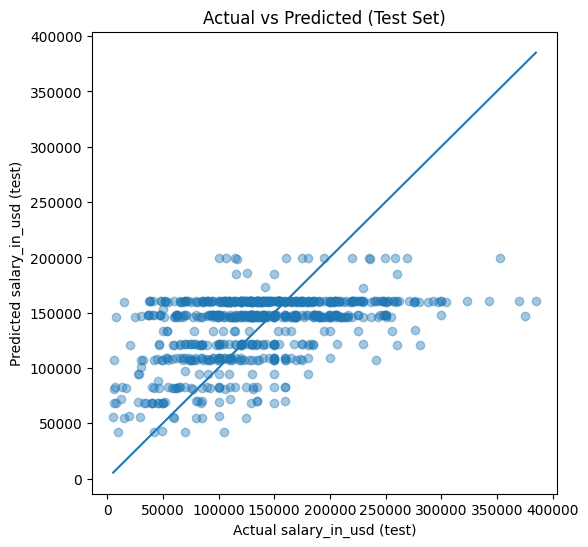

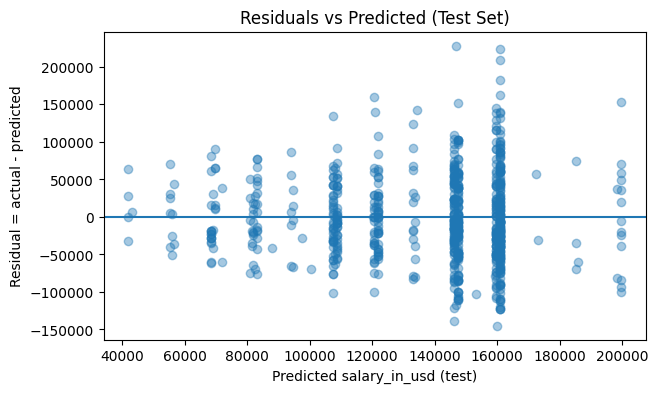

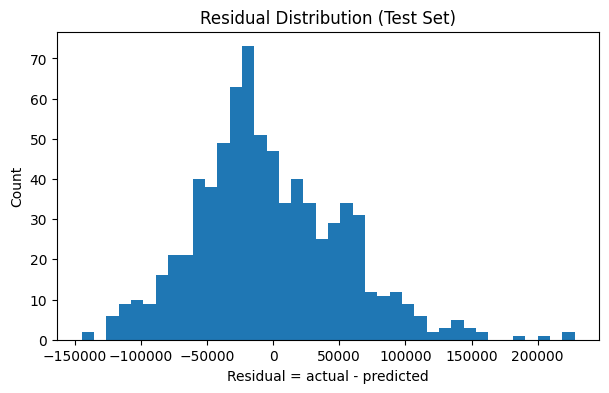

In [12]:
# Part 4
# Diagnose model performance with metrics + plots

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

# 1) Predictions on train and test
y_train_pred = problem2_model.predict(problem2_X_train)
y_test_pred  = problem2_model.predict(problem2_X_test)

# 2) Metrics (train)
train_mae = mean_absolute_error(problem2_y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(problem2_y_train, y_train_pred))
train_r2 = r2_score(problem2_y_train, y_train_pred)

# 3) Metrics (test)
test_mae = mean_absolute_error(problem2_y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(problem2_y_test, y_test_pred))
test_r2 = r2_score(problem2_y_test, y_test_pred)

print("=== Train metrics ===")
print(f"MAE:  {train_mae:,.2f}")
print(f"RMSE: {train_rmse:,.2f}")
print(f"R^2:  {train_r2:.4f}")

print("\n=== Test metrics ===")
print(f"MAE:  {test_mae:,.2f}")
print(f"RMSE: {test_rmse:,.2f}")
print(f"R^2:  {test_r2:.4f}")

# 4) Residuals (use test set for diagnostics)
residuals_test = problem2_y_test - y_test_pred

# ---- Plot A: Actual vs Predicted (test) ----
plt.figure(figsize=(6, 6))
plt.scatter(problem2_y_test, y_test_pred, alpha=0.4)
mn = min(problem2_y_test.min(), y_test_pred.min())
mx = max(problem2_y_test.max(), y_test_pred.max())
plt.plot([mn, mx], [mn, mx])  # reference line y=x
plt.xlabel("Actual salary_in_usd (test)")
plt.ylabel("Predicted salary_in_usd (test)")
plt.title("Actual vs Predicted (Test Set)")
plt.show()

# ---- Plot B: Residuals vs Predicted (test) ----
plt.figure(figsize=(7, 4))
plt.scatter(y_test_pred, residuals_test, alpha=0.4)
plt.axhline(0)
plt.xlabel("Predicted salary_in_usd (test)")
plt.ylabel("Residual = actual - predicted")
plt.title("Residuals vs Predicted (Test Set)")
plt.show()

# ---- Plot C (optional): Residual histogram (test) ----
plt.figure(figsize=(7, 4))
plt.hist(residuals_test, bins=40)
plt.xlabel("Residual = actual - predicted")
plt.ylabel("Count")
plt.title("Residual Distribution (Test Set)")
plt.show()

# Put a "reasonable metric" into the required variable if your notebook expects one
# (Pick MAE or RMSE; MAE is usually easiest to explain.)
problem2_metric = test_mae


-----
5. Predict the 2023 salary of a data scientist that works full time (1) at mid employment level (1) with 0 remote ratio. Then, looking at the output of problem2_model.coef_, which are the coefficients of the linear model, would a higher remote ratio result in a higher predicted salary or vice versa? [3p]

-----

In [13]:
# Part 5
# Put the code for part 5 below this line


In [14]:
# Part 5

import pandas as pd

# Create a one-row DataFrame representing the new observation
new_data = pd.DataFrame({
    "work_year": [2023],
    "experience_level": [1],   # Mid level
    "employment_type": [1],    # Full time
    "remote_ratio": [0]        # No remote work
})

# Use the trained model to predict the salary
problem2_predicted_salary = problem2_model.predict(new_data)[0]

print("Predicted salary:", problem2_predicted_salary)

# Check the coefficient for remote_ratio to understand its influence
remote_ratio_coef = problem2_model.coef_[problem2_features.index("remote_ratio")]
print("Coefficient for remote_ratio:", remote_ratio_coef)

# Interpretation comment:
# If remote_ratio_coef > 0 => higher remote_ratio gives higher predicted salary.
# If remote_ratio_coef < 0 => higher remote_ratio gives lower predicted salary.



Predicted salary: 121940.38437091932
Coefficient for remote_ratio: -13.029475233542966


-----
6. Advanced question: On the test set, plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). What does the confidence band tell us? What can the confidence band be used for? [3p]
-----

Number of test samples n = 751
DKW epsilon (95% band)  = 0.0496


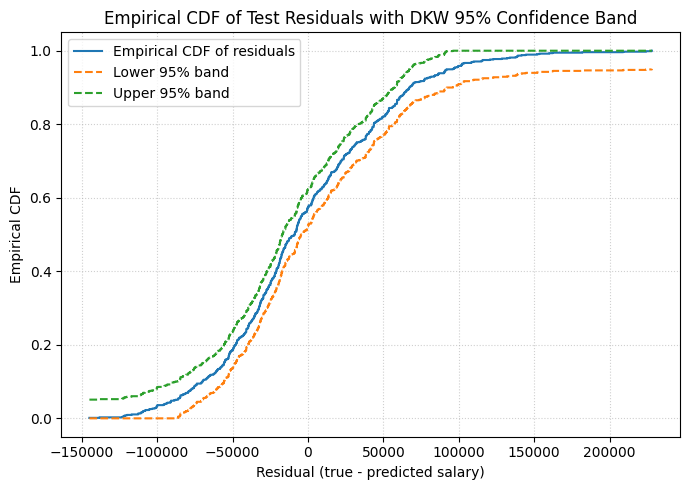

In [15]:
# Part 6
# Put the code for part 6 below this line

import numpy as np
import matplotlib.pyplot as plt

# 1. Recompute predictions and residuals on the test set (for clarity)
y_test_true = problem2_y_test
y_test_pred = problem2_model.predict(problem2_X_test)
residuals_test = y_test_true - y_test_pred

# Number of test samples
n = len(residuals_test)

# 2. Sort residuals and build empirical CDF values
residuals_sorted = np.sort(residuals_test)
ecdf_values = np.arange(1, n + 1) / n  # k/n for k = 1,...,n

# 3. Compute epsilon using the DKW inequality for 95% confidence
alpha = 0.05
epsilon = np.sqrt((1.0 / (2.0 * n)) * np.log(2.0 / alpha))

# 4. Compute lower and upper confidence bands (clipped to [0, 1])
lower_band = np.clip(ecdf_values - epsilon, 0.0, 1.0)
upper_band = np.clip(ecdf_values + epsilon, 0.0, 1.0)

print(f"Number of test samples n = {n}")
print(f"DKW epsilon (95% band)  = {epsilon:.4f}")

# 5. Plot the empirical CDF and the confidence band
plt.figure(figsize=(7, 5))

# Empirical CDF as a step function
plt.step(residuals_sorted, ecdf_values, where="post", label="Empirical CDF of residuals")

# Confidence band as two lines
plt.step(residuals_sorted, lower_band, where="post", linestyle="--", label="Lower 95% band")
plt.step(residuals_sorted, upper_band, where="post", linestyle="--", label="Upper 95% band")

plt.xlabel("Residual (true - predicted salary)")
plt.ylabel("Empirical CDF")
plt.title("Empirical CDF of Test Residuals with DKW 95% Confidence Band")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.6)
plt.tight_layout()
plt.show()


1.13 Exam vB, PROBLEM 3  
Maximum Points = 13

For this problem we have the Diabetes dataset, I have encoded the categorical features
using One-Hot encoding, namely the following 
['smoking_No Info', 'smoking_current', 'smoking_ever', 'smoking_former', 
 'smoking_never', 'smoking_not current', 'sex_Female', 'sex_Male', 'sex_Other'].

Treating this as a classification problem, we will train a logistic regression model to predict whether
the patient has diabetes or not. Then the task is to evaluate the model and using it to make some
conclusions.

Instructions:

1. Load the file data/diabetes.csv into the pandas dataframe problem3_df.  
   Decide what should be features and target, give motivations for your choices. [3p]

2. Create the problem3_X and the problem3_y as numpy arrays with problem3_X being the
   features and problem3_y being the target.  
   Do the standard train-test split with 80% training data and 20% testing data.  
   Store these in the variables defined in the cells. [2p]

3. Now train a Logistic regression model on the training data using  
   sklearn.linear_model.LogisticRegression.  
   Hint: If you use many of the One-Hot encoded features you will probably see a warning about  
   max iterations reached. Adjust the hyperparameter C (this is the penalization) when you create 
   your LogisticRegression. [2p]

4. Evaluation: Calculate the precision and recall for class 0 and 1 with 95% confidence bounds.  
   Explain their meaning. [3p]

5. Advanced question: Come up with a way to define the one-hot encoded feature that is most
   important for the prediction. Motivate your choice. [3p]


1.14 Part 1  
Double click this cell to enter edit mode and write your answer for part 1 below this line.

What features are reasonable?  
In regards to how much data we have, how many features do you think we should aim for?  
What other features would you like to have used but was not collected?  

Discussion


For this problem we have the Diabetes dataset, I have encoded the categorical features
using One-Hot encoding, namely the following 
['smoking_No Info', 'smoking_current', 'smoking_ever', 'smoking_former', 
 'smoking_never', 'smoking_not current', 'sex_Female', 'sex_Male', 'sex_Other'].

Treating this as a classification problem, we will train a logistic regression model to predict whether
the patient has diabetes or not. Then the task is to evaluate the model and using it to make some
conclusions.

Instructions:

1. Load the file data/diabetes.csv into the pandas dataframe problem3_df.  
   Decide what should be features and target, give motivations for your choices. [3p]



In [16]:
# Part 1
# Let problem3_df be the pandas dataframe that contains the data from the file
# data/visits_clean.csv
problem3_df = pd.read_csv("data/diabetes.csv")
#print(problem3_df.head(5))


## Choice of Features and Target Variable

### Target Variable

The target variable in this classification problem is:

- **`diabetes`**

**Motivation:**  
The goal of the task is to predict whether a patient has diabetes or not. The variable `diabetes` is binary (0 = no diabetes, 1 = diabetes), which makes it a natural and correct choice as the target for a **logistic regression** classification model.

---

### Feature Variables

All remaining variables, except `diabetes`, are considered **candidate features**. They can be grouped as follows:

---

### 1. One-Hot Encoded Categorical Features

These variables represent categorical patient information that has already been converted into numerical form using One-Hot Encoding:

- **Smoking status:**
  - `smoking_No Info`
  - `smoking_current`
  - `smoking_ever`
  - `smoking_former`
  - `smoking_never`
  - `smoking_not current`

- **Sex:**
  - `sex_Female`
  - `sex_Male`
  - `sex_Other`

**Motivation:**  
Logistic regression requires numerical inputs. One-Hot Encoding allows categorical variables such as smoking status and sex to be included without imposing an artificial ordering. These features are medically relevant and may influence diabetes risk.

**Note:**  
Although One-Hot Encoding introduces redundancy (e.g. all smoking categories sum to 1), keeping all columns is acceptable for this task, especially since interpretability rather than strict statistical efficiency is the main goal.

---

### 2. Numerical and Binary Medical Features

The following variables are continuous or binary medical measurements:

- `age`
- `hypertension`
- `heart_disease`
- `bmi`
- `HbA1c_level`
- `blood_glucose_level`

**Motivation:**  
These variables are well-known risk factors or indicators for diabetes:

- Age is strongly correlated with diabetes prevalence.
- Hypertension and heart disease are common comorbidities.
- BMI reflects obesity, a major risk factor.
- HbA1c and blood glucose levels are direct clinical indicators of diabetes.

Including these features provides strong predictive power and aligns with medical domain knowledge.

---

### Final Feature Set

The final feature matrix **X** consists of **all columns except `diabetes`**, i.e.:

- One-Hot encoded categorical variables (smoking status and sex)
- Numerical and binary medical variables (`age`, `hypertension`, `heart_disease`, `bmi`, `HbA1c_level`, `blood_glucose_level`)

The target vector **y** is:

- `diabetes`

This choice ensures that:

- No information leakage occurs (the target is not used as a feature)
- All relevant patient information available at prediction time is utilized
- The model remains interpretable and medically meaningful


In [17]:
# Part 1
# Fill in the features as a list of strings of the names of the columns
problem3_features = [
    "smoking_No Info",
    "smoking_current",
    "smoking_ever",
    "smoking_former",
    "smoking_never",
    "smoking_not current",
    "sex_Female",
    "sex_Male",
    "sex_Other",
    "age",
    "hypertension",
    "heart_disease",
    "bmi",
    "HbA1c_level",
    "blood_glucose_level"
]

# Fill in the target as a string with the correct column name
problem3_target = "diabetes"


-----
2. Create the problem3_X and the problem3_y as numpy arrays with problem3_X being the
   features and problem3_y being the target.  
   Do the standard train-test split with 80% training data and 20% testing data.  
   Store these in the variables defined in the cells. [2p]
-----

In [18]:
# Part 2
# Fill in your X and y below (as NumPy arrays)

# .values convert to numpy array, could also simply use .to_numpy()

# “.values and .to_numpy() both convert pandas DataFrames or Series into NumPy arrays; 
# .to_numpy() is the recommended modern approach.”
problem3_X = problem3_df[problem3_features].values
problem3_y = problem3_df[problem3_target].values

# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
problem3_X_train, problem3_X_test, problem3_y_train, problem3_y_test = train_test_split(
    problem3_X,
    problem3_y,
    train_size=0.8,
    random_state=42
)


-----
3. Now train a Logistic regression model on the training data using  
   sklearn.linear_model.LogisticRegression.  
   Hint: If you use many of the One-Hot encoded features you will probably see a warning about  
   max iterations reached. Adjust the hyperparameter C (this is the penalization) when you create 
   your LogisticRegression. [2p]
-----


## Motivation for Feature Scaling

During model training, a convergence warning was encountered when fitting the logistic regression model. This is a common issue when using gradient-based optimization methods on data where features have very different numerical scales.

In this dataset, several numerical features (such as `age`, `bmi`, `HbA1c_level`, and `blood_glucose_level`) have much larger value ranges than the One-Hot encoded categorical features, which are binary (0 or 1). Without scaling, features with larger magnitudes can dominate the optimization process, making it difficult for the algorithm to converge within the default number of iterations.

To address this issue, feature scaling was applied using `StandardScaler`, which standardizes each feature to have zero mean and unit variance. This improves numerical stability and allows the logistic regression optimizer to converge more efficiently.

The scaling step was implemented using a scikit-learn `Pipeline`, ensuring that the scaler is fitted only on the training data and that the same transformation is consistently applied to the test data. This approach prevents data leakage and follows best practices for machine learning model training.

Overall, feature scaling was introduced to ensure proper convergence of the logistic regression model while maintaining correctness and reproducibility of the results.


In [19]:
# Part 3
# Initialize your LogisticRegression model

# This code is the same as the Pipeline code below:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(problem3_X_train)
# X_test_scaled = scaler.transform(problem3_X_test)

# model = LogisticRegression(...)
# model.fit(X_train_scaled, problem3_y_train)


problem3_model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(C=1.0, max_iter=5000, random_state=42))
])

# Fit your initialized model on the training data
problem3_model.fit(problem3_X_train, problem3_y_train)

,steps,"[('scaler', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


1.15 Part 4  
Double click this cell to enter edit mode and write your answer for part 4 below this line.


-----

4. Evaluation: Calculate the precision and recall for class 0 and 1 with 95% confidence bounds.  
   Explain their meaning. [3p]
-----


## Evaluation: Precision & Recall with 95% Confidence Bounds (Hoeffding)

### Confusion Matrix

We evaluate the classifier on the test set using the confusion matrix

$$
\begin{pmatrix}
TN & FP \\
FN & TP
\end{pmatrix}
$$

where:
- $TN$ = number of true class $0$ predicted as $0$
- $FP$ = number of true class $0$ predicted as $1$
- $FN$ = number of true class $1$ predicted as $0$
- $TP$ = number of true class $1$ predicted as $1$

---

### Precision and Recall (per class)

For **class 1** (treating class 1 as the positive class):

- **Precision for class 1**:
$$
\text{Precision}_1 = \frac{TP}{TP + FP}
$$
Meaning: Among all samples predicted as class 1, the fraction that truly are class 1.

- **Recall for class 1**:
$$
\text{Recall}_1 = \frac{TP}{TP + FN}
$$
Meaning: Among all true class 1 samples, the fraction the model correctly identifies as class 1.

---

For **class 0** (treating class 0 as the “positive” class, i.e. one-vs-rest):

- **Precision for class 0**:
$$
\text{Precision}_0 = \frac{TN}{TN + FN}
$$
Meaning: Among all samples predicted as class 0, the fraction that truly are class 0.

- **Recall for class 0**:
$$
\text{Recall}_0 = \frac{TN}{TN + FP}
$$
Meaning: Among all true class 0 samples, the fraction the model correctly identifies as class 0.

---

### 95% Confidence Bounds using Hoeffding’s Inequality

Precision and recall are **proportions** of the form:

$$
\hat{p} = \frac{k}{n},
$$

where $k$ is the number of “successes” and $n$ is the number of relevant trials (e.g., $TP+FP$ for precision of class 1).

Hoeffding’s inequality gives a distribution-free bound:

$$
\mathbb{P}(|\hat{p} - p| \ge \epsilon) \le 2e^{-2n\epsilon^2}.
$$

To obtain a **95% confidence bound**, we set $\alpha = 0.05$ and solve:

$$
2e^{-2n\epsilon^2} = \alpha
$$

which yields:

$$
\epsilon = \sqrt{\frac{\ln(2/\alpha)}{2n}}.
$$

Therefore, the **95% Hoeffding confidence interval** for $p$ is:

$$
\left[\max(0, \hat{p} - \epsilon),\ \min(1, \hat{p} + \epsilon)\right].
$$

This interval describes an uncertainty range for the true precision/recall due to the finite size of the test set. Hoeffding bounds are typically conservative (may be wider), but they require minimal assumptions.


In [20]:
# This is an optional way to instead use WIlson instead of Hoeffding inequality for the bounds:
# BUT USE HOEFFDING INSTEAD FOR THIS EXERCISE, SCROLL DOWN TO THE OTHER CELL BELOW

import math

# Predict on test set
y_pred = problem3_model.predict(problem3_X_test)

# Confusion matrix with labels [0,1]
cm = confusion_matrix(problem3_y_test, y_pred, labels=[0, 1])
cm

def wilson_ci(successes, n, z=1.96):
    """95% Wilson confidence interval for a binomial proportion."""
    if n == 0:
        return (np.nan, np.nan)  # undefined if no trials
    p = successes / n
    denom = 1 + (z**2)/n
    center = (p + (z**2)/(2*n)) / denom
    half = (z / denom) * math.sqrt((p*(1-p)/n) + (z**2)/(4*n**2))
    return (center - half, center + half)

# Extract confusion matrix entries
cm00, cm01 = cm[0,0], cm[0,1]
cm10, cm11 = cm[1,0], cm[1,1]

# ---- Class 0 treated as "positive" (one-vs-rest) ----
TP0 = cm00
FP0 = cm10
FN0 = cm01

prec0_n = TP0 + FP0
rec0_n  = TP0 + FN0

precision0_ci = wilson_ci(TP0, prec0_n)
recall0_ci    = wilson_ci(TP0, rec0_n)

# ---- Class 1 treated as "positive" ----
TP1 = cm11
FP1 = cm01
FN1 = cm10

prec1_n = TP1 + FP1
rec1_n  = TP1 + FN1

precision1_ci = wilson_ci(TP1, prec1_n)
recall1_ci    = wilson_ci(TP1, rec1_n)

# Round to 2 decimals (adjust if you want more precision)
problem3_precision_0 = (round(precision0_ci[0], 2), round(precision0_ci[1], 2))
problem3_recall_0    = (round(recall0_ci[0], 2), round(recall0_ci[1], 2))
problem3_precision_1 = (round(precision1_ci[0], 2), round(precision1_ci[1], 2))
problem3_recall_1    = (round(recall1_ci[0], 2), round(recall1_ci[1], 2))

problem3_precision_0, problem3_recall_0, problem3_precision_1, problem3_recall_1


((np.float64(0.96), np.float64(0.97)),
 (np.float64(0.99), np.float64(0.99)),
 (np.float64(0.84), np.float64(0.88)),
 (np.float64(0.59), np.float64(0.64)))

In [21]:
# Give the answer for each of the following quantities in the form of a tuple
# Example:
# if the precision for class 0 is between 0.31 and 0.69, write:
# problem3_precision_0 = (0.31, 0.69)


# 1) Predict on the test set
problem3_y_pred = problem3_model.predict(problem3_X_test)

# 2) Confusion matrix with labels [0, 1]
tn, fp, fn, tp = confusion_matrix(problem3_y_test, problem3_y_pred, labels=[0, 1]).ravel()

# 3) Hoeffding 95% confidence interval for a proportion p_hat = k/n
alpha = 0.05  # for 95% confidence

def hoeffding_interval(p_hat, n, alpha=0.05):
    """
    Hoeffding bound: P(|p_hat - p| >= eps) <= 2 exp(-2 n eps^2)
    Set 2 exp(-2 n eps^2) = alpha -> eps = sqrt(log(2/alpha)/(2n))
    """
    if n == 0:
        return (np.nan, np.nan)
    eps = np.sqrt(np.log(2/alpha) / (2*n))
    # The Hoeffding bound is clipped to [0,1] since precision and recall are probabilities.
    return (max(0.0, p_hat - eps), min(1.0, p_hat + eps))
    # return (p_hat - eps, p_hat + eps) 

# ---- Class 1 (treat class 1 as "positive") ----
n_prec1 = tp + fp
prec1_hat = tp / n_prec1 if n_prec1 > 0 else np.nan
prec1_ci = hoeffding_interval(prec1_hat, n_prec1, alpha)

n_rec1 = tp + fn
rec1_hat = tp / n_rec1 if n_rec1 > 0 else np.nan
rec1_ci = hoeffding_interval(rec1_hat, n_rec1, alpha)

# ---- Class 0 (treat class 0 as "positive", one-vs-rest) ----
n_prec0 = tn + fn
prec0_hat = tn / n_prec0 if n_prec0 > 0 else np.nan
prec0_ci = hoeffding_interval(prec0_hat, n_prec0, alpha)

n_rec0 = tn + fp
rec0_hat = tn / n_rec0 if n_rec0 > 0 else np.nan
rec0_ci = hoeffding_interval(rec0_hat, n_rec0, alpha)

# Store answers as tuples (lower, upper)
# Since the hoeffding function returns (lower, upper), we need to take [0] for the lower
# and then [1] for upper and extract each value from the tuple. 
problem3_precision_0 = (round(prec0_ci[0], 2), round(prec0_ci[1], 2))
problem3_recall_0    = (round(rec0_ci[0], 2), round(rec0_ci[1], 2))
problem3_precision_1 = (round(prec1_ci[0], 2), round(prec1_ci[1], 2))
problem3_recall_1    = (round(rec1_ci[0], 2), round(rec1_ci[1], 2))

print("precision0:", problem3_precision_0)
print("recall0   :", problem3_recall_0)
print("precision1:", problem3_precision_1)
print("recall1   :", problem3_recall_1)



precision0: (np.float64(0.96), np.float64(0.98))
recall0   : (np.float64(0.98), 1.0)
precision1: (np.float64(0.83), np.float64(0.9))
recall1   : (np.float64(0.58), np.float64(0.65))


1.16 Part 5  
Double click this cell to enter edit mode and write your answer for part 5 below this line.


-----
5. Advanced question: Come up with a way to define the one-hot encoded feature that is most
   important for the prediction. Motivate your choice. [3p]
-----

### Most Important One-Hot Encoded Feature

To determine the most important one-hot encoded feature, we analyze the coefficients of the trained logistic regression model. In logistic regression, each coefficient represents the effect of a feature on the log-odds of the target variable. A larger absolute coefficient indicates a stronger influence on the prediction.

Since the categorical variables were encoded using one-hot encoding, we restrict the analysis to the corresponding binary features. We define the most important one-hot encoded feature as the one with the largest absolute coefficient value, as this feature has the strongest impact on the predicted probability of diabetes when it is active compared to when it is not.

Using this criterion, the most important one-hot encoded feature is the one with the largest absolute logistic regression coefficient among the smoking and sex indicators.

The feature smoking_No Info has the largest absolute coefficient among the one-hot encoded variables, making it the most important according to our definition. Its negative coefficient indicates that patients with missing smoking information are associated with a lower predicted probability of diabetes, all else being equal. This reflects an association learned from the data rather than a causal relationship.

In [22]:
import pandas as pd
import numpy as np

# --------------------------------------------------
# Extract coefficients from the trained logistic regression model
# --------------------------------------------------

# Because we used a Pipeline, the LogisticRegression model is stored
# under the name "logreg"
coef = problem3_model.named_steps["logreg"].coef_[0]

# --------------------------------------------------
# Pair coefficients with feature names
# --------------------------------------------------

feature_importance = pd.Series(
    coef,
    index=problem3_features
)

# --------------------------------------------------
# Restrict to one-hot encoded features only
# --------------------------------------------------

one_hot_features = [
    f for f in problem3_features
    if f.startswith("smoking_") or f.startswith("sex_")
]

one_hot_importance = feature_importance[one_hot_features]

# --------------------------------------------------
# Identify the most important one-hot encoded feature
# --------------------------------------------------
# We define importance as the largest absolute coefficient
most_important_one_hot_feature = one_hot_importance.abs().idxmax()

print("Most important one-hot encoded feature:")
print(most_important_one_hot_feature)

print("\nOne-hot encoded feature coefficients:")
print(one_hot_importance.sort_values(key=np.abs, ascending=False))


Most important one-hot encoded feature:
smoking_No Info

One-hot encoded feature coefficients:
smoking_No Info       -0.202553
smoking_current        0.098525
smoking_never          0.071564
sex_Male               0.064437
sex_Female            -0.063407
smoking_former         0.055435
smoking_ever           0.047949
smoking_not current    0.036154
sex_Other             -0.035720
dtype: float64


### Most Important One-Hot Encoded Feature (Permutation Importance)

An alternative way to define feature importance is **permutation importance**. The idea is to measure how much the model’s predictive performance decreases when the values of a feature are randomly permuted in the test set. If shuffling a feature causes a large drop in performance, then the model depended strongly on that feature, and it is considered important.

To identify the most important **one-hot encoded** feature, we compute permutation importance for all features using the trained pipeline (scaler + logistic regression), and then restrict the ranking to the one-hot encoded variables (the `smoking_*` and `sex_*` indicators). We define the most important one-hot encoded feature as the one with the **largest mean decrease in test accuracy** when permuted.

This method is model-agnostic and provides an intuitive notion of importance: it directly measures how much the model’s performance relies on each feature.


In [23]:
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance

# ------------------------------------------------------------
# Part 5 (Alternative): Permutation Importance
# ------------------------------------------------------------
# Idea:
# A feature is important if permuting (shuffling) its values in the test set
# causes a noticeable drop in model performance.
#
# We run permutation importance on the FULL pipeline (scaler + logistic regression),
# so the evaluation matches how we use the model normally.
# ------------------------------------------------------------

# Compute permutation importance on the test set
perm = permutation_importance(
    estimator=problem3_model,         # the trained Pipeline
    X=problem3_X_test,                # test features (NumPy array)
    y=problem3_y_test,                # test labels
    n_repeats=30,                     # repeat shuffling to reduce randomness
    random_state=42,
    n_jobs=-1,
    scoring="accuracy"                # metric used to measure performance drop
)

# Put results in a DataFrame with the correct feature names
perm_df = pd.DataFrame({
    "Feature": problem3_features,
    "Importance Mean": perm.importances_mean,
    "Importance Std": perm.importances_std
}).sort_values(by="Importance Mean", ascending=False)

print("Top features by permutation importance (all features):")
print(perm_df.head(10))

# ------------------------------------------------------------
# Restrict to one-hot encoded features only (smoking_*, sex_*)
# ------------------------------------------------------------
one_hot_features = [
    f for f in problem3_features
    if f.startswith("smoking_") or f.startswith("sex_")
]

perm_one_hot = perm_df[perm_df["Feature"].isin(one_hot_features)].sort_values(
    by="Importance Mean", ascending=False
)

most_important_one_hot_feature_perm = perm_one_hot.iloc[0]["Feature"]

print("\nMost important one-hot encoded feature (Permutation Importance):")
print(most_important_one_hot_feature_perm)

print("\nPermutation importance for one-hot encoded features:")
print(perm_one_hot)


Top features by permutation importance (all features):
                Feature  Importance Mean  Importance Std
13          HbA1c_level         0.044058        0.000928
14  blood_glucose_level         0.028328        0.001081
9                   age         0.006763        0.000578
12                  bmi         0.004385        0.000624
10         hypertension         0.000360        0.000258
0       smoking_No Info         0.000328        0.000195
1       smoking_current         0.000195        0.000191
4         smoking_never         0.000133        0.000179
8             sex_Other         0.000000        0.000000
3        smoking_former        -0.000052        0.000126

Most important one-hot encoded feature (Permutation Importance):
smoking_No Info

Permutation importance for one-hot encoded features:
               Feature  Importance Mean  Importance Std
0      smoking_No Info         0.000328        0.000195
1      smoking_current         0.000195        0.000191
4        smoki